In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [3]:
sales = pd.read_csv('supermarket_sales.csv')

In [4]:
df = sales.copy()

# Veri Seti Hikayesi

Invoice ID : Fatura numarası
    
Branch : Süpermarketin kategorisi (A > B > C)
     
City : Süpermarketin bulunduğu şehir (Yangon, Naypyitaw, Mandalay)
    
Customer type : Müşteri tipi (Normal, Üye)
    
Gender : Müşterinin cinsiyeti
    
Product line : Ürün kategorisi
    
Unit price : Her ürünün tanesi
    
Quantity : Alınan ürün sayısı
    
Tax 5% : %5 vergi 
    
Total : Ürünlerin toplamı
    
Date : Ürünlerin alındığı tarih
    
Time : Ürünlerin alındığı saat
    
Payment : Ödeme şekli
    
cogs : Ürünlerin maliyeti
    
gross margin percentage : yüzdelik brüt kar marjı
    
gross income : brüt gelir
    
Rating : Müşterilerin 10 üzerinden verdiği alışveriş memnun kalma puanlandırması

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Hiç eksik veri olmadığından dolayı görselleştirme yapılabilir.**

## Görselleştirme ve Hipotez Testleri

### Hangi ürün kategorisinden daha çok alışveriş yapılıyor ?

In [7]:
import seaborn as sns

In [8]:
from pandas.api.types import CategoricalDtype

In [9]:
df['Branch'] = df.Branch.astype(CategoricalDtype(categories = ['C', 'B', 'A'], ordered = True))

In [10]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

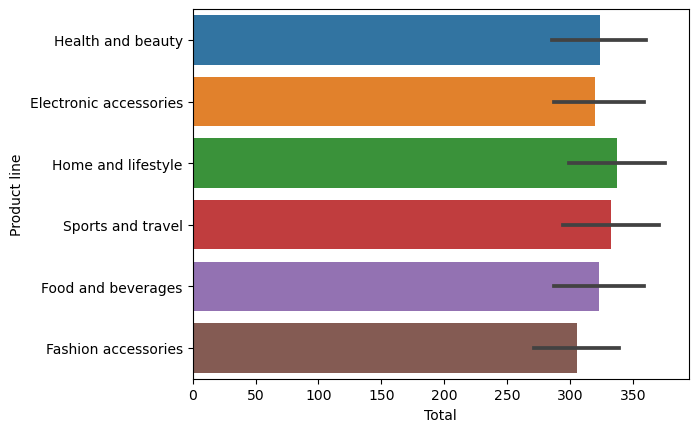

In [11]:
sns.barplot(y = 'Product line',x = 'Total', data = df);

In [12]:
ddf = df[['Product line', 'Total']].copy()

In [13]:
ddf

,Product line,Total
0,Health and beauty,548.9715
1,Electronic accessories,80.2200
2,Home and lifestyle,340.5255
3,Health and beauty,489.0480
4,Sports and travel,634.3785
...,...,...
995,Health and beauty,42.3675
996,Home and lifestyle,1022.4900
997,Food and beverages,33.4320
998,Home and lifestyle,69.1110


In [14]:
a = df['Product line'].unique().tolist()
isnormal = 0
for i in a: 
    ttest, pvalue = stats.shapiro(ddf[ddf['Product line'] == i]['Total'].values)
    if pvalue > 0.05:
        isnormal += 1


ishomogen = 0
for i in a:
    for b in a:
        if i == b:
            continue
        else:
            test, pvalue = stats.levene(ddf[ddf['Product line'] == i]['Total'].values, ddf[ddf['Product line'] == b]['Total'].values)
        if pvalue > 0.05:
            ishomogen += 1

if isnormal == len(a) and ishomogen == 30:
    print(f'All variables are normal and homogenize. We can use parametric test.')
    for i in a:
        for b in a:
            if i == b:
                continue
            else:
                test, pvalue = stats.ttest_ind(ddf[ddf['Product line'] == i]['Total'].values, ddf[ddf['Product line'] == b]['Total'].values)
            if pvalue > 0.05:
                print(f'For{i} and {b}, H0 can acceptable ')
            else:
                 print(f'For{i} and {b}, H1 can acceptable ')
    
else:
    print(f'Because of one or more variable is not normal and homogenize. We will use non-parametric test which is name Mann Whitney U test.')
    for i in a:
        for b in a:
            if i == b:
                continue
            else:
                test, pvalue = stats.mannwhitneyu(ddf[ddf['Product line'] == i]['Total'].values, ddf[ddf['Product line'] == b]['Total'].values)
            if pvalue > 0.05:
                print(f'For {i} and {b}, H0 can acceptable')
            else:
                print(f'For {i} and {b}, H1 can acceptable')

Because of one or more variable is not normal and homogenize. We will use non-parametric test which is name Mann Whitney U test.
For Health and beauty and Electronic accessories, H0 can acceptable
For Health and beauty and Home and lifestyle, H0 can acceptable
For Health and beauty and Sports and travel, H0 can acceptable
For Health and beauty and Food and beverages, H0 can acceptable
For Health and beauty and Fashion accessories, H0 can acceptable
For Electronic accessories and Health and beauty, H0 can acceptable
For Electronic accessories and Home and lifestyle, H0 can acceptable
For Electronic accessories and Sports and travel, H0 can acceptable
For Electronic accessories and Food and beverages, H0 can acceptable
For Electronic accessories and Fashion accessories, H0 can acceptable
For Home and lifestyle and Health and beauty, H0 can acceptable
For Home and lifestyle and Electronic accessories, H0 can acceptable
For Home and lifestyle and Sports and travel, H0 can acceptable
For Ho

**Bu ortalamalar şansa bağlı ortaya çıkmıştır. Tüm ürün kategorilerinin satış geliri arasında bir fark yoktur.**

### Üye olanlar mı yoksa normal müşteriler mi daha fazla alışveriş yapıyor?

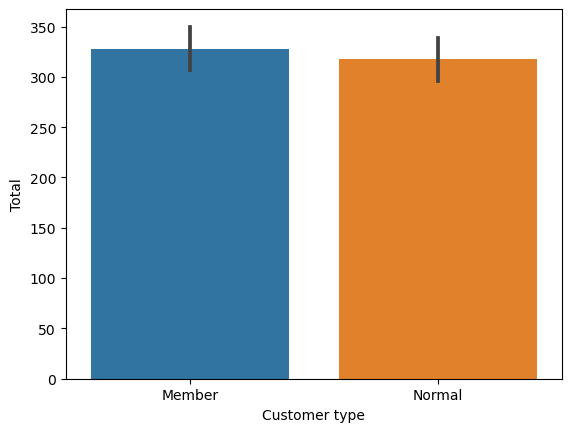

In [15]:
sns.barplot(x = 'Customer type', y = 'Total', data = df);

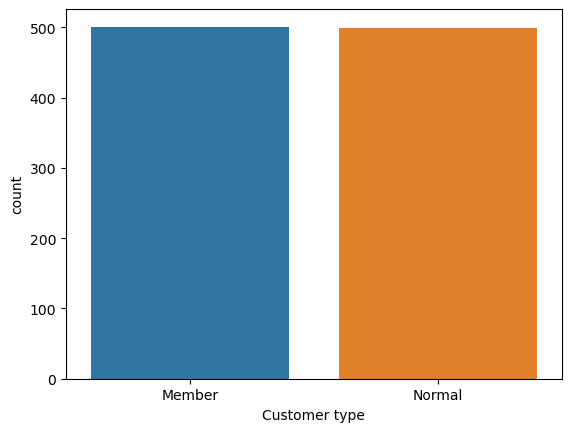

In [16]:
sns.countplot(x = 'Customer type', data = df);

In [17]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [18]:
ttest, pvalue = stats.shapiro(df[df['Customer type'] == 'Member']['Total'])
pvalue > 0.05

False

In [19]:
ttest, pvalue = stats.mannwhitneyu(df[df['Customer type'] == 'Member']['Total'], df[df['Customer type'] == 'Normal']['Total'])
pvalue > 0.05

True

**Normal ve Member müşterilerinde aynı sayıda satış geliri elde edilmektedir**

Görselden üye olanlar ve normal müşteriler toplamda aynı sayıda veya çok yakın sayıda alışveriş yapmaktadır. Lakin, üye olanlar daha fazla para harcamaktadır.

### Hangi günler daha fazla alışveriş yapılıyor?

In [20]:
df['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [21]:
df.Date = pd.to_datetime(df.Date)

In [22]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [23]:
df['Date'].max()

Timestamp('2019-03-30 00:00:00')

In [24]:
import datetime

In [25]:
def day(x):
    day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day = datetime.datetime.strptime(x, '%m/%d/%Y').weekday()
    
    return day_name[day]

In [26]:
df['Day'] = df['Date'].apply(day)

TypeError: strptime() argument 1 must be str, not Timestamp

In [ ]:
df

In [ ]:
a = sns.barplot(x = 'Day', y ='Total', data = df)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [ ]:
df.groupby(by = 'Day')['Total'].sum().sort_values()

In [ ]:
a = df['Day'].unique().tolist()
isnormal = 0
for i in a: 
    ttest, pvalue = stats.shapiro(df[df['Day'] == i]['Total'].values)
    if pvalue > 0.05:
        isnormal += 1


ishomogen = 0
for i in a:
    for b in a:
        if i == b:
            continue
        else:
            test, pvalue = stats.levene(df[df['Day'] == i]['Total'].values, df[df['Day'] == b]['Total'].values)
        if pvalue > 0.05:
            ishomogen += 1

if isnormal == len(a) and ishomogen == 30:
    print(f'All variables are normal and homogenize. We can use parametric test.')
    for i in a:
        for b in a:
            if i == b:
                continue
            else:
                test, pvalue = stats.ttest_ind(df[df['Day'] == i]['Total'].values, df[df['Day'] == b]['Total'].values)
            if pvalue > 0.05:
                print(f'For{i} and {b}, H0 can acceptable ')
            else:
                 print(f'For{i} and {b}, H1 can acceptable ')
    
else:
    print(f'Because of one or more variable is not normal and homogenize. We will use non-parametric test which is name Mann Whitney U test.')
    for i in a:
        for b in a:
            if i == b:
                continue
            else:
                test, pvalue = stats.mannwhitneyu(df[df['Day'] == i]['Total'].values, df[df['Day'] == b]['Total'].values)
            if pvalue > 0.05:
                print(f'For {i} and {b}, H0 can acceptable')
            else:
                print(f'For {i} and {b}, H1 can acceptable')

**Günler arasındaki satış geliri arasında bir fark yoktur.**

### Hangi şehirde daha fazla satış yapılıyor?

In [ ]:
a = df['City'].unique().tolist()
isnormal = 0
for i in a: 
    ttest, pvalue = stats.shapiro(df[df['City'] == i]['Total'].values)
    if pvalue > 0.05:
        isnormal += 1


ishomogen = 0
for i in a:
    for b in a:
        if i == b:
            continue
        else:
            test, pvalue = stats.levene(df[df['City'] == i]['Total'].values, df[df['City'] == b]['Total'].values)
        if pvalue > 0.05:
            ishomogen += 1

if isnormal == len(a) and ishomogen == 30:
    print(f'All variables are normal and homogenize. We can use parametric test.')
    for i in a:
        for b in a:
            if i == b:
                continue
            else:
                test, pvalue = stats.ttest_ind(df[df['City'] == i]['Total'].values, df[df['City'] == b]['Total'].values)
            if pvalue > 0.05:
                print(f'For{i} and {b}, H0 can acceptable ')
            else:
                 print(f'For{i} and {b}, H1 can acceptable ')
    
else:
    print(f'Because of one or more variable is not normal and homogenize. We will use non-parametric test which is name Mann Whitney U test.')
    for i in a:
        for b in a:
            if i == b:
                continue
            else:
                test, pvalue = stats.mannwhitneyu(df[df['City'] == i]['Total'].values, df[df['City'] == b]['Total'].values)
            if pvalue > 0.05:
                print(f'For {i} and {b}, H0 can acceptable')
            else:
                print(f'For {i} and {b}, H1 can acceptable')

**Tüm şehirlerde aynı miktarda satış geliri elde edilmektedir.**

In [27]:
ttest, pvalue = stats.ttest_ind(df[df['City'] == 'Yangon']['Total'], df[df['City'] == 'Mandalay']['Total'])

In [28]:
pvalue > 0.05

True

### Müşteriler en çok hangi ödeme yöntemini kullanıyor? 

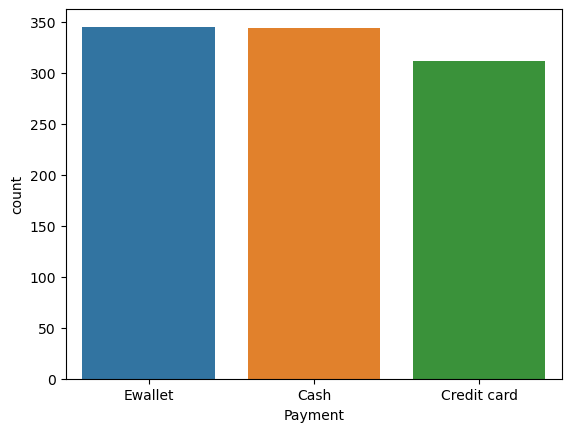

In [29]:
sns.countplot(x = 'Payment', data = df);

In [30]:
ttest, pvalue = stats.shapiro(df[df['Payment'] == 'Ewallet']['Total'])
pvalue > 0.05

False

In [31]:
ttest, pvalue = stats.shapiro(df[df['Payment'] == 'Cash']['Total'])
pvalue > 0.05

False

In [32]:
ttest, pvalue = stats.shapiro(df[df['Payment'] == 'Credit card']['Total'])
pvalue > 0.05

False

**Hepsi normal dağılıma uygun değildir. Mann Whitney testi yapılacaktır**

In [33]:
ttest, pvalue = stats.mannwhitneyu(df[df['Payment'] == 'Ewallet']['Total'],df[df['Payment'] == 'Cash']['Total'])
pvalue > 0.05

True

**Bu iki ödeme yönteminin ortalamaları arasında bir fark yoktur. Her iki ödeme yöntemi de aynı sayıda kullanılmaktadır.**

In [34]:
ttest, pvalue = stats.mannwhitneyu(df[df['Payment'] == 'Ewallet']['Total'],df[df['Payment'] == 'Credit card']['Total'])
pvalue > 0.05

True

**Bu iki ödeme yönteminin ortalamaları arasında bir fark yoktur. Her iki ödeme yöntemi de aynı sayıda kullanılmaktadır.**

In [35]:
ttest, pvalue = stats.mannwhitneyu(df[df['Payment'] == 'Cash']['Total'],df[df['Payment'] == 'Credit card']['Total'])
pvalue > 0.05

True

**Bu iki ödeme yönteminin ortalamaları arasında bir fark yoktur. Her iki ödeme yöntemi de aynı sayıda kullanılmaktadır.**

### Daha çok kadınlar mı yoksa erkekler mi daha fazla alışveriş yapıyor?

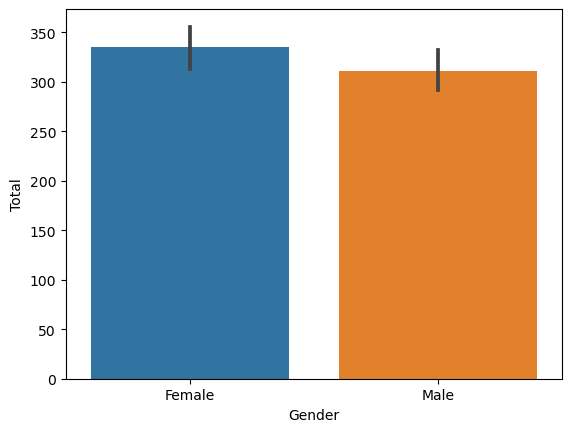

In [36]:
sns.barplot(x = 'Gender', y = 'Total', data = df);

In [37]:
ttest, pvalue = stats.shapiro(df[df['Gender'] == 'Female']['Total'])
pvalue > 0.05

False

In [38]:
ttest, pvalue = stats.shapiro(df[df['Gender'] == 'Male']['Total'])
pvalue > 0.05

False

**Her ikisi de normal dağılmamıştır**

In [39]:
ttest, pvalue = stats.mannwhitneyu(df[df['Gender'] == 'Female']['Total'], df[df['Gender'] == 'Male']['Total'])
pvalue > 0.05

True

Erkekler ve kadınlar aynı sayıda alışveriş yapmaktadır

### Hangi aylarda daha çok alışveriş yapılıyor?

In [40]:
df['Month'] = df['Date'].dt.month_name()

In [41]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [42]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,March
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8,February
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0,February
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2,January
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9,February


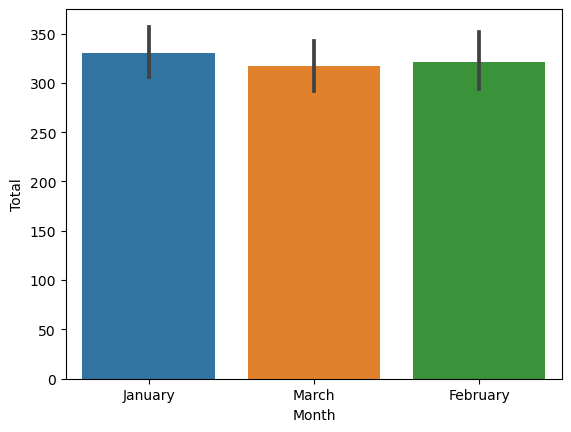

In [43]:
sns.barplot(x = 'Month', y = 'Total', data = df);

In [44]:
stats.shapiro(df[df['Month'] == 'January']['Total'])

ShapiroResult(statistic=0.9170124530792236, pvalue=5.007587768925126e-13)

In [45]:
stats.shapiro(df[df['Month'] == 'March']['Total'])

ShapiroResult(statistic=0.8950222134590149, pvalue=1.1144221904611697e-14)

In [46]:
stats.shapiro(df[df['Month'] == 'February']['Total'])

ShapiroResult(statistic=0.9098659157752991, pvalue=1.6943862762505701e-12)

In [47]:
stats.ttest_ind(df[df['Month'] == 'January']['Total'], df[df['Month'] == 'February']['Total'])

Ttest_indResult(statistic=0.49366428651111327, pvalue=0.6217092857192658)

In [48]:
stats.ttest_ind(df[df['Month'] == 'January']['Total'], df[df['Month'] == 'March']['Total'])

Ttest_indResult(statistic=0.7014287394397869, pvalue=0.4832702888203173)

In [49]:
stats.ttest_ind(df[df['Month'] == 'February']['Total'], df[df['Month'] == 'March']['Total'])

Ttest_indResult(statistic=0.18603507908113384, pvalue=0.8524756529254642)

**Aylarda gerçekleştirilen satış gelirleri arasında bir fark yoktur**

Peki aykırı gözlemleri ortadan kaldırır isek sonuçlar aynı olacak mı?

In [58]:
from sklearn.neighbors import LocalOutlierFactor
f = df.select_dtypes(['float64', 'int64']).copy()

In [53]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [59]:
clf.fit_predict(f)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1, -1,  1

In [61]:
df_scores = clf.negative_outlier_factor_

In [68]:
esik_Deger = np.sort(df_scores)[50]

In [69]:
aykiri_tf = df_scores > esik_Deger

In [70]:
aykiri_tf

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [71]:
yeni_tf = df[aykiri_tf]

In [82]:
stats.shapiro(yeni_tf[yeni_tf['Month'] == 'January']['Total'])

ShapiroResult(statistic=0.9217677116394043, pvalue=3.0443874417945826e-12)

In [83]:
stats.shapiro(yeni_tf[yeni_tf['Month'] == 'February']['Total'])

ShapiroResult(statistic=0.9176542162895203, pvalue=2.154773755258521e-11)

In [84]:
stats.shapiro(yeni_tf[yeni_tf['Month'] == 'March']['Total'])

ShapiroResult(statistic=0.899590790271759, pvalue=6.084108911119657e-14)

In [85]:
stats.mannwhitneyu(yeni_tf[yeni_tf['Month'] == 'January']['Total'], yeni_tf[yeni_tf['Month'] == 'February']['Total'])

MannwhitneyuResult(statistic=47768.5, pvalue=0.9798952739347228)

In [86]:
stats.mannwhitneyu(yeni_tf[yeni_tf['Month'] == 'March']['Total'], yeni_tf[yeni_tf['Month'] == 'February']['Total'])

MannwhitneyuResult(statistic=45795.5, pvalue=0.6732605474593878)

In [87]:
stats.mannwhitneyu(yeni_tf[yeni_tf['Month'] == 'January']['Total'], yeni_tf[yeni_tf['Month'] == 'March']['Total'])

MannwhitneyuResult(statistic=56444.0, pvalue=0.6362387497726875)